# Import the necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image

In [2]:
image = cv2.imread('/content/pngtree-beautiful-train-tracks-that-lead-into-deep-green-forest-image_2530076.png')

In [3]:
image

array([[[21, 33, 27],
        [19, 30, 24],
        [19, 30, 24],
        ...,
        [ 9, 14, 11],
        [ 7, 11,  9],
        [10, 16, 12]],

       [[12, 26, 19],
        [21, 33, 27],
        [12, 30, 20],
        ...,
        [ 7, 11,  9],
        [ 9, 14, 11],
        [ 9, 14, 11]],

       [[ 9, 19, 13],
        [12, 26, 19],
        [10, 23, 15],
        ...,
        [ 7, 11,  9],
        [10, 16, 12],
        [ 9, 14, 11]],

       ...,

       [[17, 62, 43],
        [28, 69, 58],
        [39, 75, 69],
        ...,
        [20, 34, 34],
        [23, 40, 39],
        [16, 52, 35]],

       [[39, 70, 66],
        [47, 82, 77],
        [50, 90, 82],
        ...,
        [20, 34, 34],
        [21, 37, 36],
        [23, 40, 39]],

       [[28, 69, 58],
        [26, 83, 62],
        [19, 69, 49],
        ...,
        [21, 37, 36],
        [14, 40, 28],
        [20, 34, 34]]], dtype=uint8)

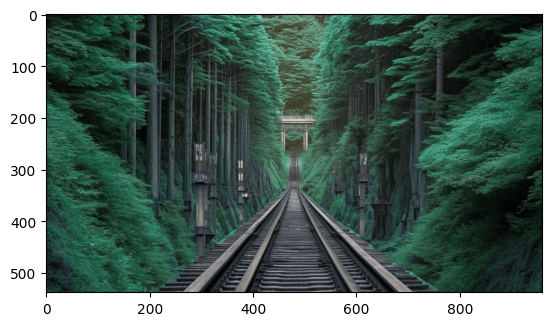

In [4]:
plt.imshow(image)

# Convert the image from BGR to RGB

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
image

array([[[27, 33, 21],
        [24, 30, 19],
        [24, 30, 19],
        ...,
        [11, 14,  9],
        [ 9, 11,  7],
        [12, 16, 10]],

       [[19, 26, 12],
        [27, 33, 21],
        [20, 30, 12],
        ...,
        [ 9, 11,  7],
        [11, 14,  9],
        [11, 14,  9]],

       [[13, 19,  9],
        [19, 26, 12],
        [15, 23, 10],
        ...,
        [ 9, 11,  7],
        [12, 16, 10],
        [11, 14,  9]],

       ...,

       [[43, 62, 17],
        [58, 69, 28],
        [69, 75, 39],
        ...,
        [34, 34, 20],
        [39, 40, 23],
        [35, 52, 16]],

       [[66, 70, 39],
        [77, 82, 47],
        [82, 90, 50],
        ...,
        [34, 34, 20],
        [36, 37, 21],
        [39, 40, 23]],

       [[58, 69, 28],
        [62, 83, 26],
        [49, 69, 19],
        ...,
        [36, 37, 21],
        [28, 40, 14],
        [34, 34, 20]]], dtype=uint8)

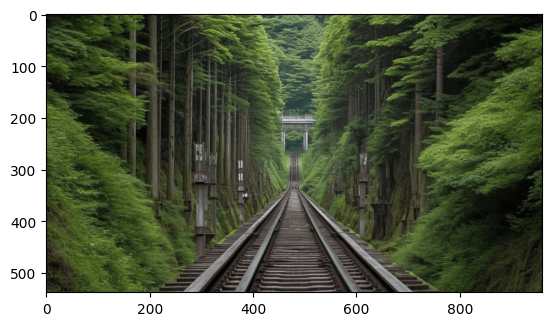

In [7]:
plt.imshow(image)

# Define the range of colors

In [8]:
lower_range = np.array([2, 2, 2])
upper_range = np.array([70, 70, 70])

# Create mask

In [9]:
mask = cv2.inRange(image, lower_range, upper_range)

In [10]:
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ..., 255, 255, 255],
       [255,   0,   0, ..., 255, 255, 255],
       [255,   0, 255, ..., 255, 255, 255]], dtype=uint8)

# Apply the mask

In [11]:
result = cv2.bitwise_and(image, image, mask=mask)

In [12]:
result

array([[[27, 33, 21],
        [24, 30, 19],
        [24, 30, 19],
        ...,
        [11, 14,  9],
        [ 9, 11,  7],
        [12, 16, 10]],

       [[19, 26, 12],
        [27, 33, 21],
        [20, 30, 12],
        ...,
        [ 9, 11,  7],
        [11, 14,  9],
        [11, 14,  9]],

       [[13, 19,  9],
        [19, 26, 12],
        [15, 23, 10],
        ...,
        [ 9, 11,  7],
        [12, 16, 10],
        [11, 14,  9]],

       ...,

       [[43, 62, 17],
        [58, 69, 28],
        [ 0,  0,  0],
        ...,
        [34, 34, 20],
        [39, 40, 23],
        [35, 52, 16]],

       [[66, 70, 39],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [34, 34, 20],
        [36, 37, 21],
        [39, 40, 23]],

       [[58, 69, 28],
        [ 0,  0,  0],
        [49, 69, 19],
        ...,
        [36, 37, 21],
        [28, 40, 14],
        [34, 34, 20]]], dtype=uint8)

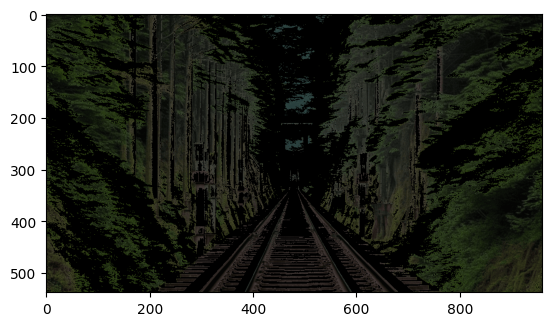

In [13]:
plt.imshow(result)
plt.show()

# Reinhard color transfer

In [14]:
def get_mean_and_std(x):
	x_mean, x_std = cv2.meanStdDev(x)
	x_mean = np.hstack(np.around(x_mean,2)) # 9.879
	x_std = np.hstack(np.around(x_std,2))
	return x_mean, x_std

In [15]:
template = cv2.imread('/content/images (6).jpg')

In [16]:
template = cv2.cvtColor(template,cv2.COLOR_BGR2RGB)

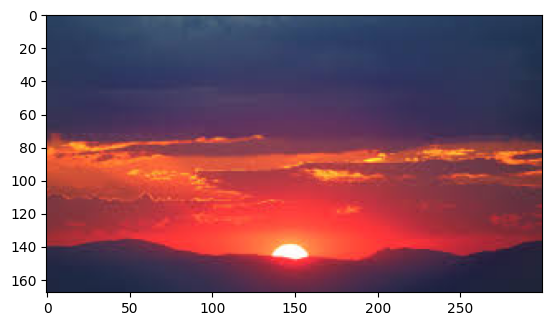

In [17]:
plt.imshow(template)

In [18]:
template_img = cv2.imread('/content/images (6).jpg')

template_img = cv2.cvtColor(template_img,cv2.COLOR_BGR2LAB)
template_mean, template_std = get_mean_and_std(template_img)

In [19]:
input_img = cv2.imread('/content/pngtree-beautiful-train-tracks-that-lead-into-deep-green-forest-image_2530076.png')
input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2LAB)


img_mean, img_std = get_mean_and_std(input_img)


height, width, channel = input_img.shape

In [20]:
for i in range(0,height):
        for j in range(0,width):
            for k in range(0,channel):
              x = input_img[i,j,k]
              x = ((x-img_mean[k])*(template_std[k]/img_std[k]))+template_mean[k]
              x = round(x)
              # boundary check
              x = 0 if x<0 else x
              x = 255 if x>255 else x
              input_img[i,j,k] = x
input_img= cv2.cvtColor(input_img,cv2.COLOR_LAB2BGR)
cv2.imwrite('out.jpg', input_img)

True

In [21]:
out = cv2.imread('/content/out.jpg')

In [22]:
out = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)

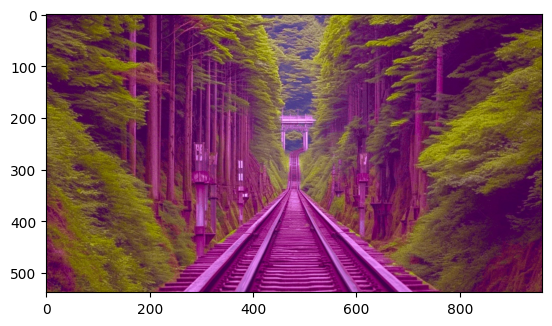

In [23]:
plt.imshow(out)